# XAI Random Forest

# Importing modules and loading dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd "/content/drive/Shareddrives/DM_Project/dataset/"
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from pandas.io.formats.style_render import DataFrame
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
import numpy as np
from sklearn.metrics import classification_report

user_tweets = pd.read_csv("./users_clustering.csv")
#user_tweets.drop(columns=['name', 'lang', 'created_at', 'id'], axis=1,inplace=True)
user_tweets.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/Shareddrives/DM_Project/dataset


id              name lang  bot           created_at  \
0  2353593986   Lamonica Raborn   en    1  2019-02-22 18:00:42   
1  2358850842     Lourie Botton   en    0  2019-02-26 03:02:32   
2   137959629  Dadan Syarifudin   en    1  2015-04-30 07:09:56   
3   466124818    Carletto Focia   it    1  2017-01-18 02:49:18   
4  2571493866         MBK Ebook   en    0  2019-06-18 19:30:21   

   statuses_count  reply_count_total  favorite_count_total  \
0              76                0.0                    53   
1              54                0.0                    31   
2               3                0.0                     0   
3              50                3.0                   617   
4            7085                6.0                  4862   

   num_hashtags_total  retweet_count_avg  ...  reply_count_entropy  \
0                  19         117.593496  ...            -0.000000   
1                  15        1494.196262  ...            -0.000000   
2                   1         302.314760  ...            -0.000000   
3                 187         787.027048  ...             0.023633   
4                 482         299.236650  ...             0.017488   

   favorite_count_entropy  num_hashtags_entropy  num_mentions_entropy  \
0                0.904465              0.635960              1.189302   
1                0.862258              0.568979              1.217996   
2                0.999211              0.918296              1.299771   
3                1.042790              0.566554              1.375077   
4                1.033267              0.598187              1.317542   

   retweet_count_per_day  reply_count_per_day  favorite_count_per_day  \
0              33.250575             0.000000                0.121839   
1             370.090278             0.000000                0.071759   
2               0.000000             0.000000                0.000000   
3             847.970858             0.002498                0.513739   
4            3091.799373             0.018809               15.241379   

   num_hashtags_per_day    avg_len  avg_spc_len  
0              0.043678  60.845528     3.910569  
1              0.034722  68.000000     3.560748  
2              0.000546  65.647059     4.333333  
3              0.155704  86.453632     5.537094  
4              1.510972  71.771845     3.571602  

[5 rows x 32 columns]

# Classification with RF


In [ ]:
selected = user_tweets.columns.tolist()[5:]

non_skewed_dists = [
  "avg_spc_len",
  "avg_len",
  "num_mentions_entropy",
  "num_hashtags_entropy",
  "favorite_count_entropy",
  "retweet_count_entropy",
  "num_mentions_std",
  "num_urls_std",
  "num_hashtags_std",
  "num_mentions_avg",
  "num_urls_avg"
]

for col in selected:
  if col not in non_skewed_dists:
    print(col)
    user_tweets.loc[:, col] = user_tweets[col].apply(lambda x: np.log10(x+1))

user_tweets.drop(columns=['name', 'lang', 'created_at', 'id'], axis=1,inplace=True)
user_tweets.head()

statuses_count
reply_count_total
favorite_count_total
num_hashtags_total
retweet_count_avg
reply_count_avg
favorite_count_avg
num_hashtags_avg
retweet_count_std
reply_count_std
favorite_count_std
reply_count_entropy
retweet_count_per_day
reply_count_per_day
favorite_count_per_day
num_hashtags_per_day


bot  statuses_count  reply_count_total  favorite_count_total  \
0    1        1.886491           0.000000              1.732394   
1    0        1.740363           0.000000              1.505150   
2    1        0.602060           0.000000              0.000000   
3    1        1.707570           0.602060              2.790988   
4    0        3.850401           0.845098              3.686904   

   num_hashtags_total  retweet_count_avg  reply_count_avg  favorite_count_avg  \
0            1.301030           2.074061         0.000000            0.155608   
1            1.204120           3.174698         0.000000            0.110495   
2            0.301030           2.481894         0.000000            0.000000   
3            2.274158           2.896541         0.001006            0.169326   
4            2.683947           2.477464         0.000790            0.393596   

   num_hashtags_avg  num_urls_avg  ...  reply_count_entropy  \
0          0.062383      0.170732  ...             0.000000   
1          0.056976      0.158879  ...             0.000000   
2          0.124939      0.147009  ...             0.000000   
3          0.058621      0.170015  ...             0.010144   
4          0.059275      0.143204  ...             0.007529   

   favorite_count_entropy  num_hashtags_entropy  num_mentions_entropy  \
0                0.904465              0.635960              1.189302   
1                0.862258              0.568979              1.217996   
2                0.999211              0.918296              1.299771   
3                1.042790              0.566554              1.375077   
4                1.033267              0.598187              1.317542   

   retweet_count_per_day  reply_count_per_day  favorite_count_per_day  \
0               1.534668             0.000000                0.049931   
1               2.569480             0.000000                0.030097   
2               0.000000             0.000000                0.000000   
3               2.928893             0.001083                0.180051   
4               3.490352             0.008093                1.210623   

   num_hashtags_per_day    avg_len  avg_spc_len  
0              0.018567  60.845528     3.910569  
1              0.014824  68.000000     3.560748  
2              0.000237  65.647059     4.333333  
3              0.062846  86.453632     5.537094  
4              0.399842  71.771845     3.571602  

[5 rows x 28 columns]

In [ ]:
from sklearn.model_selection import train_test_split
label = user_tweets.pop('bot')
train_set, test_set, train_label, test_label = train_test_split(user_tweets, label, stratify =label, test_size=0.20, random_state=42)

In [ ]:
print(train_set.shape, train_label.shape)
print(test_set.shape, test_label.shape)

(9206, 27) (9206,)
(2302, 27) (2302,)


In [ ]:
unnorm_train_set = train_set.copy()
unnorm_test_set = test_set.copy()
norm_train_set = train_set.copy()
norm_test_set = test_set.copy()

method = "standard"

if method == "minmax":
  scaler = MinMaxScaler()
elif method == "standard":
  scaler = StandardScaler()

norm_train_set.loc[:, :] = scaler.fit_transform(norm_train_set.loc[:, :])
norm_test_set.loc[:, :] = scaler.transform(norm_test_set.loc[:, :])

In [ ]:

def report_scores(test_label, test_pred):
    print(classification_report(test_label, 
                            test_pred, 
                            target_names=['Real', 'Bot']))

In [ ]:
rf = RandomForestClassifier()
best_rf = RandomForestClassifier(n_estimators = 50, 
                             criterion='gini',
                             max_features='auto',
                             max_depth=36, 
                             min_samples_split=2,
                             min_samples_leaf=4,
                             bootstrap=False) 
best_rf = rf.fit(train_set, train_label)
#prediction on the test test
test_pred_rf = best_rf.predict(test_set)
#compute the performance of the model
report_scores(test_label, test_pred_rf)

              precision    recall  f1-score   support

        Real       0.97      0.93      0.95      1079
         Bot       0.94      0.98      0.96      1223

    accuracy                           0.96      2302
   macro avg       0.96      0.95      0.96      2302
weighted avg       0.96      0.96      0.96      2302



# XAI

In [ ]:
!pip install lime
!pip install shap 
!pip install aix360

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# LIME

In [ ]:
import lime
import lime.lime_tabular
import shap
from tqdm import tqdm

from aix360.metrics import faithfulness_metric, monotonicity_metric

import warnings
warnings.filterwarnings("ignore")

In [ ]:
lime_explainer = lime.lime_tabular.LimeTabularExplainer(train_set.values,
                                                        feature_names=train_set.columns.tolist(),
                                                        class_names=["real", "bot"],
                                                        discretize_continuous=True, random_state=10)
predict_fn_rf = lambda x: best_rf.predict_proba(x).astype(float)

In [ ]:
choosen_instance = train_set.values[0]
exp = lime_explainer.explain_instance(choosen_instance, predict_fn_rf,num_features=10)
exp.show_in_notebook(show_table=True, show_all=False)

In [ ]:
choosen_instance = train_set.values[0]
exp = lime_explainer.explain_instance(choosen_instance, predict_fn_rf,num_features=100)
exp.show_in_notebook(show_table=True, show_all=False)

In [ ]:
exp.local_exp

{1: [(0, -0.28606689106761135),
  (3, 0.07523623568465937),
  (1, -0.06594017789603329),
  (2, 0.03419293702596984),
  (26, -0.021071604376964603),
  (5, 0.017171073724787166),
  (14, 0.01716901174233364),
  (12, -0.015047832581170238),
  (24, -0.014910177507203224),
  (8, -0.014857474712823572),
  (22, 0.01328521640572812),
  (20, -0.011504019014344022),
  (17, 0.011026973234670192),
  (9, 0.009776912102843895),
  (18, -0.009189923371578914),
  (16, 0.009115240993185428),
  (11, 0.0077187069429954566),
  (6, -0.006611902592342439),
  (19, -0.006379562513158335),
  (13, 0.005371637564507196),
  (25, 0.005342727555115339),
  (10, 0.003428325962699978),
  (15, 0.003370606708738439),
  (23, -0.0025262978498646893),
  (4, -0.002072893607199065),
  (7, -0.0018418206852922154),
  (21, 0.0006154448265528167)]}

In [ ]:
ncases = 100
fait = np.zeros(ncases)
mono = []

with tqdm(total=len(range(ncases))) as pbar:
  for i in range(ncases):
    predicted_class = best_rf.predict(train_set.values[i].reshape(1,-1))[0]
    exp = lime_explainer.explain_instance(train_set.values[i], best_rf.predict_proba, top_labels=1)
    le = exp.local_exp[predicted_class]
    m = exp.as_map()
    
    x = train_set.values[i]
    base = np.zeros(x.shape[0])
    coefs = np.zeros(x.shape[0])
    
    for v in le:
      coefs[v[0]] = v[1]
    fait[i] = faithfulness_metric(best_rf, train_set.values[i], coefs, base)
    monotone = monotonicity_metric(best_rf,  x, coefs, base)
    mono.append(monotone)
    pbar.update(1)


mono = np.array(mono)
print("\nFaithfulness metric mean: ", np.mean(fait))
print("Faithfulness metric standard deviation:", np.std(fait))
print(f"Monotinicity: {mono.sum()}/{len(mono)}")

100%|██████████| 100/100 [22:58<00:00, 13.79s/it]


Faithfulness metric mean:  0.19205585326903038
Faithfulness metric standard deviation: 0.3918061528545183
Monotinicity: 0/100


# SHAP

In [ ]:
shap_test_set = test_set[0:50]

RF_explainer = shap.KernelExplainer(best_rf.predict, shap_test_set.values)
shap_values = RF_explainer.shap_values(shap_test_set.values)

  0%|          | 0/50 [00:00<?, ?it/s]

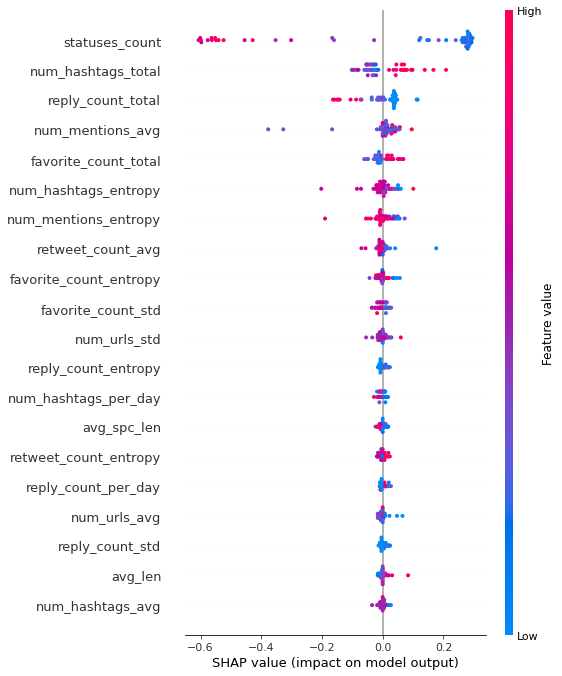

In [ ]:
shap.summary_plot(shap_values, shap_test_set)
shap.initjs()
shap.force_plot(RF_explainer.expected_value, shap_values, shap_test_set)

In [ ]:
shap.initjs()
shap.force_plot(RF_explainer.expected_value, shap_values[10,:], test_set.iloc[10,:])

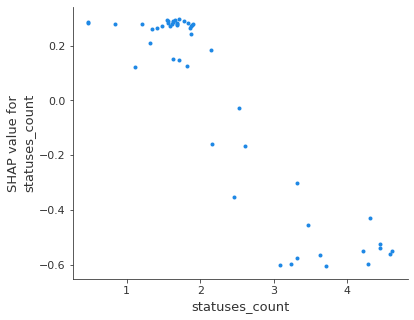

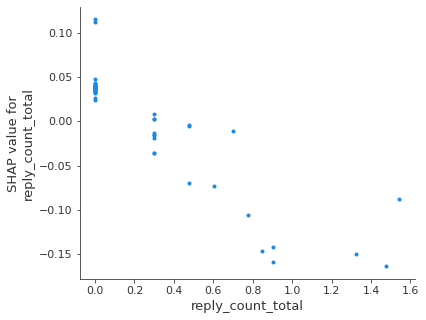

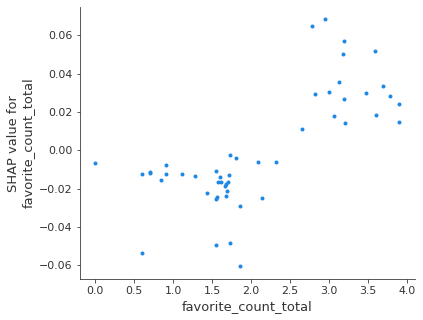

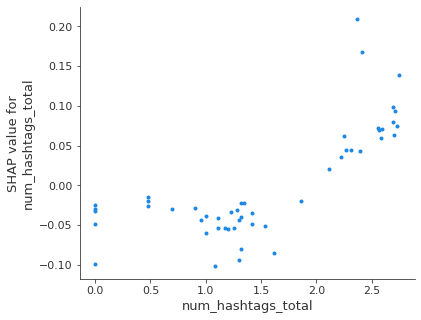

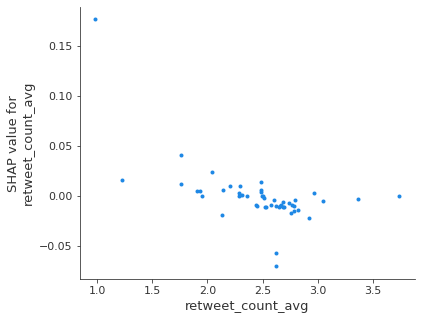

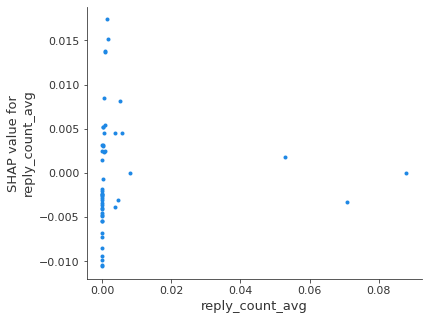

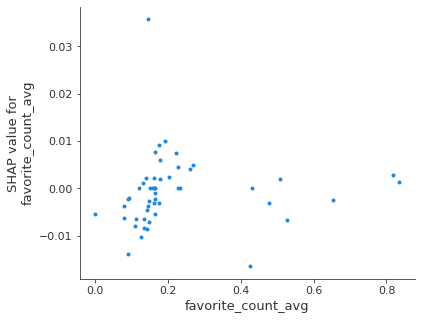

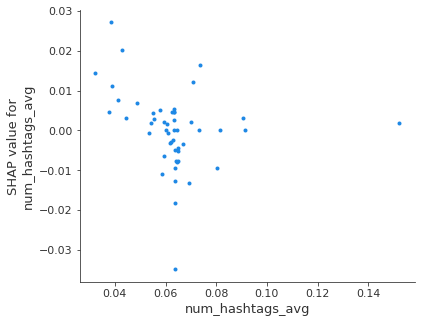

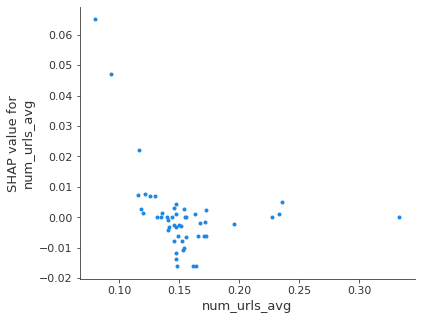

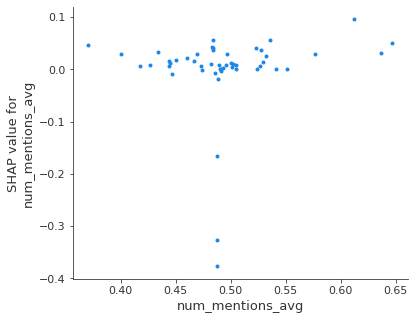

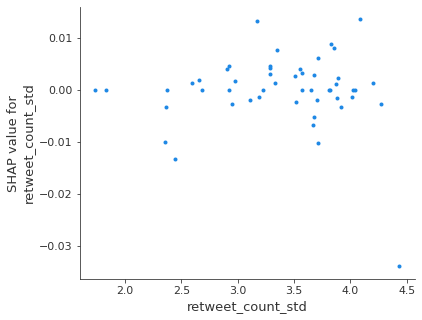

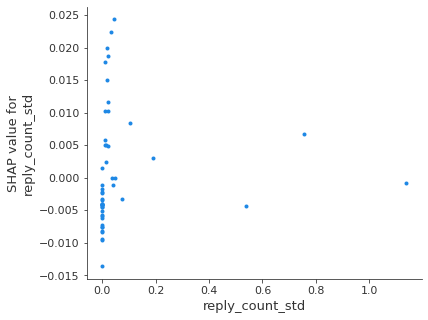

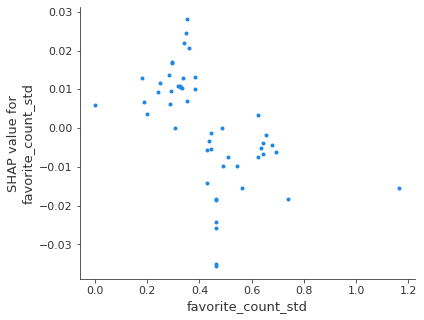

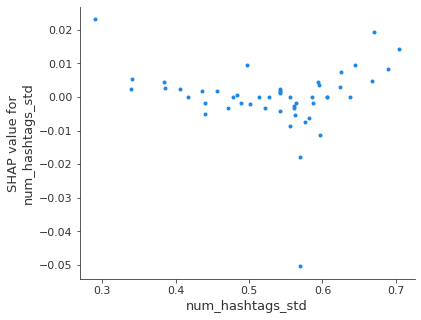

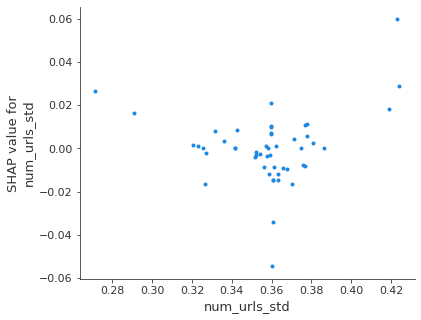

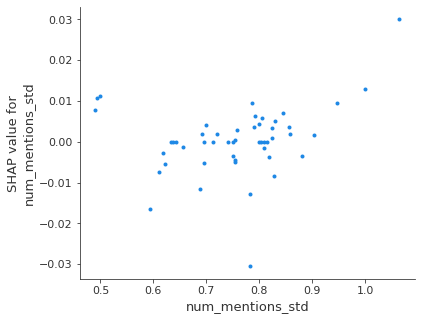

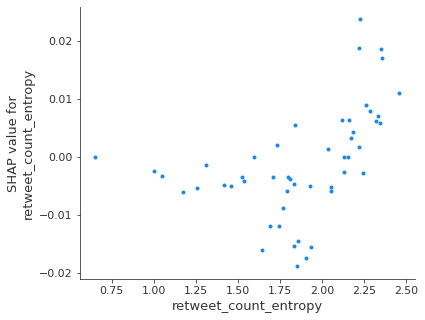

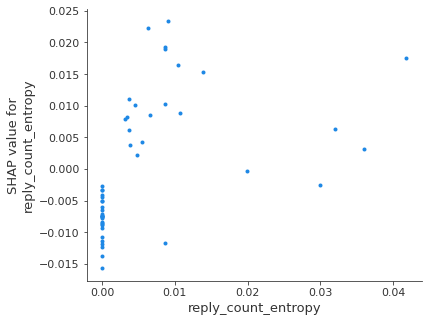

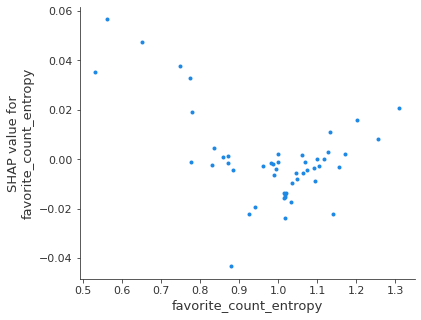

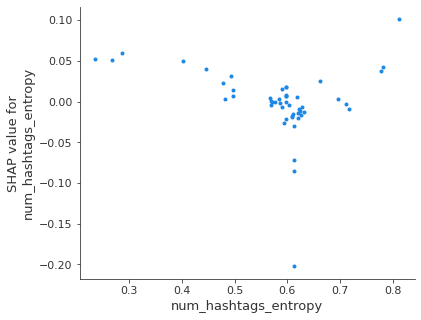

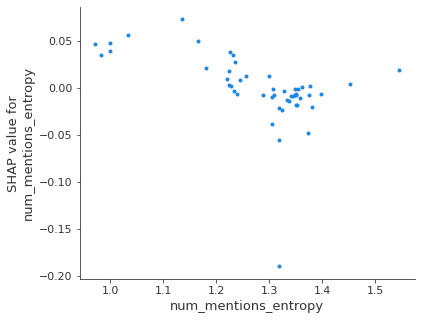

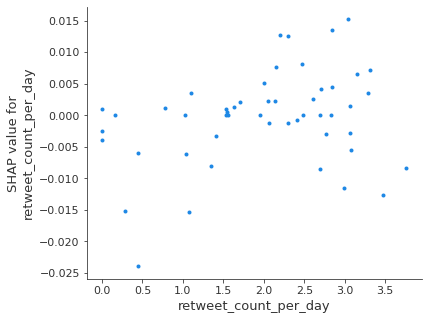

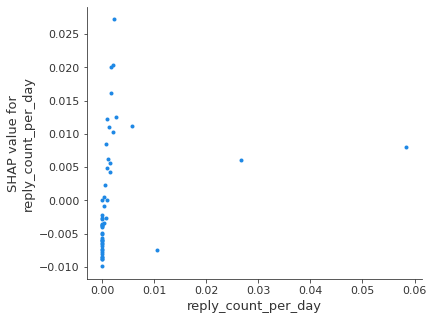

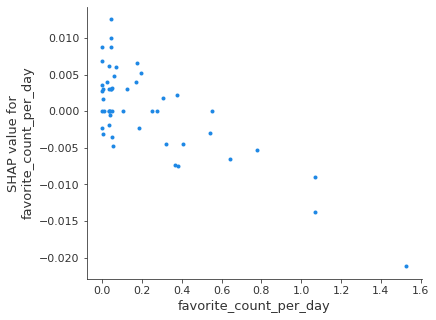

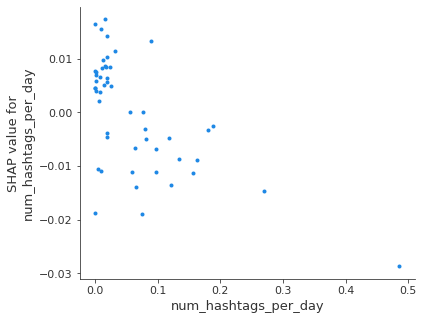

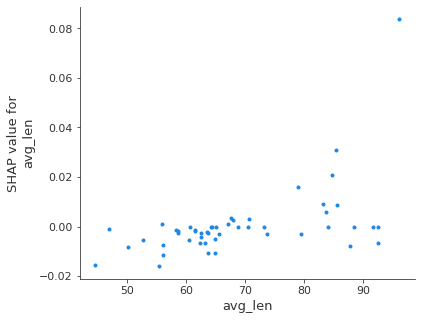

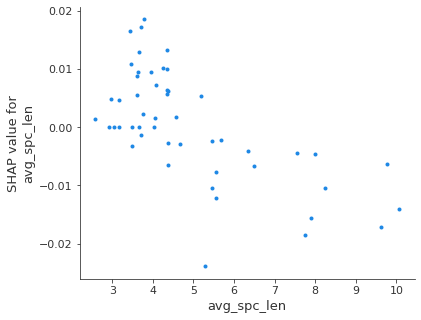

In [ ]:
for col in train_set.columns:
  shap.dependence_plot(col, shap_values, shap_test_set, interaction_index=None)

In [ ]:
predicted_class = best_rf.predict(test_set.values[0].reshape(1,-1))[0]

x = test_set.values[0]

base = np.zeros(x.shape[0])

print("Faithfulness: ", faithfulness_metric(best_rf, x, shap_values[predicted_class], base))
print("Monotonity: ", monotonicity_metric(best_rf, x, shap_values[predicted_class], base))

Faithfulness:  -0.059403423920017955
Monotonity:  False


In [ ]:
ncases = 100
fait = np.zeros(ncases)
mono = []

with tqdm(total=len(range(ncases))) as pbar:
  for i in range(ncases):
    predicted_class = best_rf.predict(test_set.values[i].reshape(1,-1))[0]
    fait[i] = faithfulness_metric(best_rf, test_set.values[i], shap_values[predicted_class], base)
    monotone = monotonicity_metric(best_rf, x, shap_values[predicted_class], base)
    mono.append(monotone)
    pbar.update(1)

mono = np.array(mono)
print("\nFaithfulness metric mean: ", np.mean(fait))
print("Faithfulness metric standard deviation:", np.std(fait))
print(f"Monotinicity: {mono.sum()}/{len(mono)}")

100%|██████████| 100/100 [00:59<00:00,  1.68it/s]


Faithfulness metric mean:  0.2490307881691942
Faithfulness metric standard deviation: 0.3440136902144101
Monotinicity: 0/100
